In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [51]:
df= pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.sample(5)

,Survived,Age,Fare
335,0,NaN,7.8958
486,1,35.0,90.0000
785,0,25.0,7.2500
682,0,20.0,9.2250
231,0,29.0,7.7750


In [52]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [53]:
x=df.drop(columns="Survived")
y=df["Survived"]

In [54]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
x_train["Age_imputed"]= x_train["Age"]
x_test["Age_imputed"]= x_test["Age"]

In [56]:
x_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [57]:
x_test.head()

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


In [58]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [59]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([42.  , 27.  , 36.  , 30.  , 27.  , 20.  ,  0.67, 19.  , 28.  ,
       20.  , 36.  , 46.  , 35.  , 23.  , 29.  , 39.  ,  9.  ,  6.  ,
       26.  , 54.  , 18.  , 27.  , 24.  , 36.  , 19.  , 23.  , 24.  ,
       43.  , 25.  , 11.  , 62.  , 60.  , 16.  , 24.  , 32.  ,  1.  ,
       22.  , 16.  , 58.  , 22.  , 26.  , 34.  , 21.  , 26.  , 30.  ,
       56.  , 65.  , 17.  , 22.  , 25.  , 24.  , 62.  , 33.  , 30.  ,
       20.  , 46.  , 34.  , 20.  , 16.  , 32.  , 40.  , 25.  , 42.  ,
       24.  , 32.  , 15.  ,  2.  , 21.  , 36.  , 22.  , 19.  , 36.  ,
       44.  , 31.  , 27.  , 33.  ,  4.  , 19.  , 54.  , 31.  , 34.  ,
       36.  , 35.  ,  0.83, 53.  ,  0.83, 19.  , 24.  , 33.  , 71.  ,
       40.  , 63.  , 18.  , 21.  , 36.  , 35.  , 31.  ,  3.  , 42.  ,
        5.  , 31.  , 13.  , 15.  , 43.  , 52.  , 40.  ,  3.  ,  9.  ,
       24.  , 25.  , 28.  , 16.  , 31.  , 50.  , 25.  , 20.  , 26.  ,
       23.  , 14.  , 12.  , 23.  , 20.  , 28.5 , 36.  , 27.  , 22.  ,
       60.  , 70.5 ,

C:\Users\Deepak\anaconda3\envs\HamsaEnvironments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Deepak\anaconda3\envs\HamsaEnvironments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


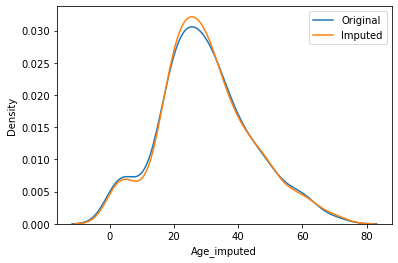

In [60]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [61]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  200.53637590018047


In [62]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,60.428487
Age,71.512440,204.349513,204.349513
Age_imputed,60.428487,204.349513,200.536376


<AxesSubplot:>

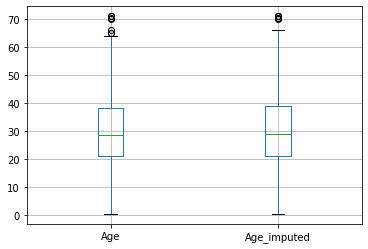

In [63]:
x_train[['Age', 'Age_imputed']].boxplot()

In [64]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [65]:
X = data
y = data['SalePrice']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [68]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
890,Po,TA,122900,TA,Po
864,NaN,TA,250580,TA,NaN
817,Gd,TA,271000,TA,Gd
222,TA,TA,179900,TA,TA
1310,TA,TA,335000,TA,TA


In [69]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Deepak\AppData\Local\Temp\ipykernel_7452\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Deepak\AppData\Local\Temp\ipykernel_7452\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Deepak\AppData\Local\Temp\ipykernel_7452\856878696.py:4: SettingWithCopyWarning: 
A va

In [70]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [71]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.646465
TA,0.412439,0.538721
Fa,0.040917,0.056117
Po,0.027823,0.037037
Ex,0.024550,0.032548


C:\Users\Deepak\anaconda3\envs\HamsaEnvironments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Deepak\anaconda3\envs\HamsaEnvironments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Deepak\anaconda3\envs\HamsaEnvironments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

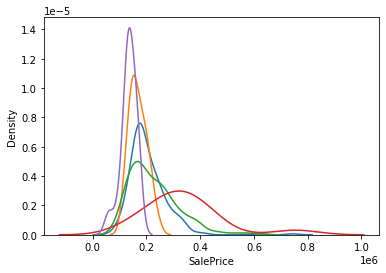

In [72]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Deepak\anaconda3\envs\HamsaEnvironments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Deepak\anaconda3\envs\HamsaEnvironments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Deepak\anaconda3\envs\HamsaEnvironments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

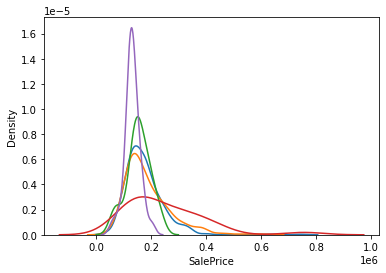

In [73]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()